<a target="_blank" href="https://colab.research.google.com/github/echoi/compgeodyn/blob/master/NumericalIntegration.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Numerical Integration formula

Also called **quadrature formula**, any explicit formula that is suitable for providing an approximation of 
\begin{equation}
 I(f) = \int_{a}^{b} f(x) dx.
\end{equation}

Continuing the idea of approximating a function with polynomials, i.e., $f \approx f_{n}$, where $f_{n}$ is a polynomial, the integration of $f$ can be also approximated as
\begin{equation}
  I(f) \approx I_{n}(f) = \int_{a}^{b} f_{n}(x) dx \text{ for } n \ge 0.
\end{equation}

- A general quadrature formula is given as
    \begin{equation}
      I_{n}(f) = \sum_{i=0}^{n}\alpha_{i}f(x_{i}),
    \end{equation}
    where $\alpha_{i}$ are **coefficients** or **weights**.
- If $f_{n}$ is an interpolating polynomial, $I_{n}(f)$ can be easily computed.     
- For an obvious reason, this quadrature formula is called **interpolatory** quadrature formula.

## Classical integration methods
We are already familiar with the idea of quadrature formula. Let's recall the following classical formulae:
- Mid-point or rectangle formula
\begin{equation}
I_{0}(f) = (b-a)f\left( \frac{a+b}{2} \right)
\end{equation}
<img src="./Figures/Quarteroni_Fig9.1.PNG" width="1200">


- Trapezoidal formula
\begin{equation}
I_{1}(f) = \frac{b-a}{2}[f(a) + f(b)]
\end{equation}
- Cavalieri-Simpson formula
\begin{equation}
I_{2}(f) = \frac{b-a}{6}\left[ f(a) + 4f\left(\frac{a+b}{2}\right)+f(b)\right]
\end{equation}
<img src="./Figures/Quarteroni_Fig9.2.PNG" width="1200">

- Newton-Cotes formulae
    - Formulae achieved when $f_{n}$ is a Lagrange interpolating polynomial on equally-spaced nodes.
    
    \begin{split}
      I_{n}(f) &= \sum_{i=0}^{n}\alpha_{i}f(x_{i}) \quad \text{ and } \\
      \alpha_{i} &= \int_{a}^{b}l_{i}(x)dx
    \end{split}
    
    - Degree 0, 1 and 2 correspond to mid-point, trapezoidal and Simpson formula, respectively.


## Degree of exactness
**Definition**: Degree of exactness of a quadrature formula is the **maximum integer** r ($\ge 0$) for which $I_{n}(f) = I(f)$ for $^{\forall}f \in \mathbb{P}_{r}$.

#### Example
Lagrange quadrature formula has the degree of exactness of $n$ when it has $n+1$ nodes.

## Gauss quadrature

- Let $x_{0},\cdots,x_{n}$ be $n+1$ distinct points in $[-1,1]$. 
- We want to approximate 
\begin{equation}
I_{w}(f) = \int_{-1}^{1} f(x)w(x) dx,
\end{equation}
with $f \in \mathbb{C}^{0}([-1,1])$.
- We specifically want a quadrature formula,
\begin{equation}
I_{n,w}(f) = \sum_{i=0}^{n} \alpha_{i}f(x_{i}).
\end{equation}


- $E_{n,w}(f) = I_{w}(f) - I_{n,w}(f)$: The error of the quadrature formula.
- If $E_{n,w}(p)=0$ for any $p\in \mathbb{P}_{r}$ ($r\ge 0$), we say that the quadrature formula has the degree of exactness $r$ with respect to the weight $w$.
- Going back to the **Lagrange interpolation**,
\begin{equation}
 I_{n,w}(f) = \int_{-1}^{1} \Pi_{n}f(x)w(x)dx
\end{equation}
has degree of exactness equal to (at least) $n$.
- In other words, the quadrature formula has at least $n$ deg. of exact. if $\alpha_{i} = \int_{-1}^{1}l_{i}(x)w(x)dx$ for $i=0,\cdots,n$.

- The key question is whether suitable choices of the nodes exist such that the deg. of exact. is **greater than**  $n$.
- Exactly integrate a polynomial of a degreen greater than $n$ only with $n$ nodes?
- It might sound like a petty attempt to cheat but it IS possible!


### Theorem due to Jacobi
$^{\exists}m>0$, the quadrature formula, $I_{n,w}(f) = \sum_{i=0}^{n} \alpha_{i}f(x_{i})$ has deg. of exact. $n+m$ if and only if it is of interpolatory type and the nodal polynomial $\omega_{n+1}(x) = \prod_{i=0}^{n}(x-x_{i})$ associated with the nodes $\{x_{i}\}$ is $\int_{-1}^{1} \omega_{n+1}(x) p(x) w(x) dx = 0$ for $^{\forall}p \in \mathbb{P}_{m-1}$.

#### Partial proof of the theorem
1. Show the conditions are sufficient

    - If $f\in \mathbb{P}_{n+m}$, then there exist a quotient $\pi_{m-1} \in \mathbb{P}_{m-1}$ and a remainder $q_{n} \in \mathbb{P}_{n}$ such that
    \begin{equation}
    f = \omega_{n+1}\pi_{m-1} + q_{n}.
    \end{equation}
    - Since the deg. of exact. of an interpolatory formula with $n+1$ nodes is at least $n$, we get
    \begin{equation}
    \sum_{i=0}^{n}\alpha_{i}q_{n}(x_{i}) = \int_{-1}^{1}q_{n}(x)w(x)dx = \int_{-1}^{1} f(x)w(x)dx - \int_{-1}^{1} \omega_{n+1}\pi_{m-1}w\,dx.
    \end{equation}
    - From the condition, the last term on r.h.s. is zero. Thus
    \begin{equation}
    \int_{-1}^{1}f(x)w(x)dx = \sum_{i=0}^{n}\alpha_{i}q_{n}(x_{i}) = \sum_{i=0}^{n}\alpha_{i}f(x_{i}).
    \end{equation}
        - Note that since $\omega_{n+1}$ is the nodal polynomial (i.e., $\omega_{n+1}(x_{i})=0$ for all $i$), $f(x_{i}) = q_{n}(x_{i})$.
    - Since $f$ is arbitrary, $E_{n+m}(f)=0$ for any $f \in \mathbb{P}_{n+m}$.
2. The conditions are also necessary (Quarteroni left it as homework for us.)    

- A corollary from the above theorem is that the **maximum deg. of exact.** of the quadrature formula is $2n+1$.
- So, for the maximum deg. of exact., we set $m=n+1$: i.e., it is required that
\begin{equation}
\int_{-1}^{1}\omega_{n+1}(x)p(x)w(x)dx = 0 \quad ^{\forall}p \in \mathbb{P}_{n}.
\end{equation}
- This shows that $\omega_{n+1}$ is a $n+1$ degree polynomial that is orthogonal to all the polynomials of lower degree.
- $\therefore$ we conclude that $\omega_{n+1}(x)$ is the monic polynomial multiple of $p_{n+1}(x)$, where $p_{n+1}(x)$ is the $(n+1)$-th element in the system of orthogonal polynomials.
- Roots of $\omega_{n+1}$ coincide with those of $p_{n+1}$: i.e., $p_{n+1}(x_{j})=0$ for $j=0,\cdots,n$.
- We say $\{x_{i}\}$ are **Gauss nodes** associated with a weight, $w(x)$.

In summary, Gauss quadrature formula is given as follows:
\begin{equation}
 I_{n,w}(f) = \sum_{i=0}^{n} \alpha_{i}f(x_{i})
\end{equation}
with 
\begin{equation}
 \alpha_{i} = \int_{-1}^{1} l_{i}(x)w(x)dx 
\end{equation}
and the nodes $\{x_{i} \}$ are the roots of $p_{n+1}$: i.e., $p_{n+1}(x_{i})=0$ for $i=0,\cdots,n$.

#### Example
Let's consider 2 point Gauss quadrature formula with $w(x)=1$ when $n=1$.
\begin{equation}
 I = \int_{-1}^{1} f(x) dx \approx \alpha_{0}f(x_{0}) + \alpha_{1}f(x_{1}).
\end{equation}
- Deg. of exact.  = $2n+1$ = 3.

If $f(x) = a_{3}x^{3} + a_{2}x^{2} + a_{1}x + a_{0}$, we get
\begin{equation}
 \left[\frac{a_{3}}{4}x^{4} + \frac{a_{2}}{3}x^{3} + \frac{a_{1}}{2}x^{2} + a_{0}x\right]_{-1}^{1} = \alpha_{0}\left(a_{3}x_{0}^{3} + a_{2}x_{0}^{2} + a_{1}x_{0} + a_{0}\right) + \alpha_{1}\left(a_{3}x_{1}^{3} + a_{2}x_{1}^{2} + a_{1}x_{1} + a_{0}\right).
\end{equation}


\begin{equation}
\frac{2}{3}a_{2} + 2a_{0} = \left( \alpha_{0}x_{0}^{3} + \alpha_{1}x_{1}^{3} \right)a_{3} + \left( \alpha_{0}x_{0}^{2} + \alpha_{1}x_{1}^{2} \right)a_{2} + \left( \alpha_{0}x_{0} + \alpha_{1}x_{1} \right)a_{1} + \left( \alpha_{0} + \alpha_{1} \right)a_{0}
\end{equation}

By requiring the equation to hold for any cubic polynomial $f(x)$,
\begin{align}
\alpha_{0}x_{0}^{3} + \alpha_{1}x_{1}^{3} &= 0 \\
\alpha_{0}x_{0}^{2} + \alpha_{1}x_{1}^{2} &= \frac{2}{3} \\
\alpha_{0}x_{0} + \alpha_{1}x_{1} &= 0 \\
\alpha_{0} + \alpha_{1} &= 2
\end{align}

We've got four equations for four unknowns so can solve the above system of equations. 
$\alpha_{0}=1$, $\alpha_{1}=1$, $x_{0}=-1/\sqrt{3}$ and $x_{1}=1/\sqrt{3}$. 


This process of finding the Gauss quadrature formula is much simplified if the Gauss nodes are roots of $p_{n+1}$.

Since $n=1$ and $w(x)=1$, the Gauss nodes are the roots of the degree 2 Legendre polynomial:
\begin{equation}
 p_{2} = L_{2} = \frac{3}{2}x^{2} - \frac{1}{2} = 0.
\end{equation}
So, the nodes are $\pm 1/\sqrt{3}$.
Finally, 
\begin{equation}
l_{0}(x) = \frac{x-x_{2}}{x_{1}-x_{2}},\quad l_{1}(x) = \frac{x-x_{1}}{x_{1}-x_{2}}.
\end{equation}

\begin{align}
\alpha_{0} &= \int_{-1}^{1}l_{0}(x)dx = \frac{1}{x_{1}-x_{2}} \left[ \frac{1}{2}x^{2} - x_{2}x \right]_{-1}^{1} = 1 \\
\alpha_{1} &= 1.
\end{align}


direct integration: -1.0 
 quadrature result: -1.0000000000000002


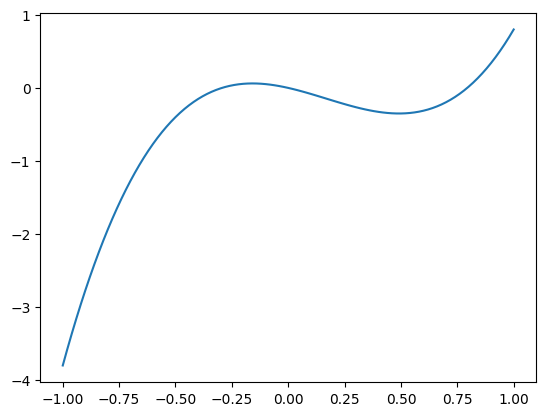

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(a, x):
    sum = 0.0
    for i in range(4):
        sum += a[i]*np.power(x, i)
    return sum

def fint(a, x):
    return a[3]/4.0*x**4 + a[2]/3.0*x**3 + a[1]/2.0*x**2 + a[0]*x

def fdint(a, xmin, xmax):
    return fint(a,xmax) - fint(a,xmin)

a = np.array([0., -0.7, -1.5, 3.0])
xmin = -1.0
xmax = 1.0
fdint(a, xmin, xmax)
print('direct integration:',fdint(a, xmin, xmax),'\n','quadrature result:', f(a, -1.0/np.sqrt(3)) + f(a, 1.0/np.sqrt(3)) )

x = np.linspace(xmin, xmax, 101)
plt.plot(x, f(a,x))

## Gauss-Lobatto quadrature
- Note that Gauss nodes are well within the integration interval.
- However, it is often useful to also include the end points among the quadrature nodes.
- So, we require that the Gauss formula with the highest degree of exactness is the one that employs as nodes the $n+1$ roos of the polynomial,
\begin{equation}
\bar{\omega}_{n+1}(x) = p_{n+1}(x) + ap_{n}(x) + bp_{n-1}(x),
\end{equation}
  where $a$ and $b$ are selected such that $\bar{\omega}_{n+1}(-1) = \bar{\omega}_{n+1}(1) = 0$.
    - Now we have only $n-1$ roots to determine.
- Denoting these roots by $\bar{x}_{0}=-1, \bar{x}_{1},\ldots,\bar{x}_{n}=1$, the coefficients ${\bar{\alpha}_{i},i=0,\ldots,n}$ can then be obtained from
\begin{equation}
\bar{\alpha}_{i} = \int_{-1}^{1}\bar{l}_{i}(x)w(x)dx, \quad i=0,\ldots,n,
\end{equation}
where $\bar{l}_{i}(x)$ is still the i-th characteristic Lagrange polynomial of degree $n$.
- The $n-1$ nodes $\{\bar{x}_{i}\}$ are the roots of $p_{n}'(x)=0$, where $p_{n}(x)$ is the degree $n$ orthogonal polynomial with respect to a given weight function.



With the above defined nodes $\{x_{i}\}$'s and the coefficients $\{\alpha_{i}\}$'s, we get the following **Gauss-Lobatto quadrature formula**:
\begin{equation}
 I^{GL}_{n,w}(f) = \sum_{i=0}^{n} \bar{\alpha}_{i}f(\bar{x}_{i}).
\end{equation}

- Unlike the Gauss quadrature, the GL quadrature has the deg. of exact. of $2n-1$.

#### Gauss-Legendre-Lobatto (GLL) quadrature
- *Legendre* means $w(x)$=1.

For $n \ge 0$, 
- the **Gauss** nodes and coefficients are given by

    - \begin{equation} 
        x_{j}: \text{ Zeros of } L_{n+1}(x).
      \end{equation}

    - \begin{equation} 
        \alpha_{j} = \frac{2}{(1-x_{j}^{2})[L'_{n+1}(x_{j})]^{2}} \text{ for } j=0, \ldots, n. 
      \end{equation}

- the **Gauss-Legendre-Lobatto** nodes and coefficients are

    - \begin{equation}
        \bar{x}_{0}= -1,\ \bar{x}_{n}=1,\ \bar{x}_{j}: \text{Zeros of } L'_{n}(x) \text{ for } j=1,\ldots,n-1.
      \end{equation}
      
    - \begin{equation}
        \bar{\alpha}_{j} = \frac{2}{n(n+1)[L_{n}(x_{j})]^{2}} \text{ for } j=0, \ldots, n. 
      \end{equation}
      
- $L_{n}$: Degree $n$ Legendre polynomial.

#### Verifications
1. Deg. of exact. $= 1$
    - Gauss: $2n+1=1$, $n=0$ $\Longrightarrow 1$ node, root of $L_{n+1} = L_{1}$
    - GLL: $2n-1=1$, $n=1$ $\Longrightarrow 2$ nodes, $-1$ and $1$.
2. Deg. of exact. $= 3$
    - Gauss: $2n+1=3$, $n=1$ $\Longrightarrow 2$ nodes, roots of $L_{n+1} = L_{2}$
    - GLL: $2n-1=3$, $n=2$ $\Longrightarrow 3$ nodes, root of $L'_{2}$ and $\pm 1$.


### Convergence for the integration of general function
For a more general $f$ (i.e., not necessarily a polynomial), the Gauss formula has the following convergence property:
\begin{equation}
\lim_{n\rightarrow +\infty} \left\lvert \int_{-1}^{1} f(x)w(x) dx - \sum_{j=0}^{n}\alpha_{j}f(x_{j}) \right\rvert = 0 \text{ for } ^{\forall}f \in \mathbb{C}^{0}([-1,1]).
\end{equation}

- This result holds for the Gauss-Lobatto formula.

### Integration over an arbitrary interval
Let $\phi:[-1,1] \rightarrow [a,b]$ be the affine map,
\begin{equation}
x = \phi(\xi) = \frac{b-a}{2}\xi + \frac{a+b}{2}.
\end{equation}
Then,
\begin{align}
\int_{a}^{b} f(x)dx &= \frac{b-a}{2} \int_{-1}^{1} (f \circ \phi)(\xi)d\xi \\
                    &= \frac{b-a}{2} \sum_{j=0}^{n}\beta_{j} (f \circ \phi)(\xi_{j}) \\
                    &= \sum_{j=0}^{n}\alpha_{j}f(x_{j}),
\end{align}
where $\xi_{j}$ are nodes in $[-1,1]$ and $\beta_{j}$ are weights on $[-1,1]$.

\begin{equation}
\therefore \alpha_{j} = \frac{b-a}{2}\beta_{j}, \quad x_{j} = \phi(\xi_{j}),
\end{equation}

So, **nodes are mapped and weights are scaled.**
